<a href="https://colab.research.google.com/github/vk18mishra/Movielens-Misc-Project/blob/main/Super_Bonus_Vivek_Mishra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Bonus Task - Analysis on MoviLens Dataset

In [ ]:
#importing all the neccesary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings('ignore')
     

In [ ]:
#getting the movie lens dataset
!wget --no-check-certificate https://files.grouplens.org/datasets/movielens/ml-25m.zip

--2023-01-15 12:21:06--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M   104MB/s    in 2.4s    

2023-01-15 12:21:09 (104 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]



In [ ]:
#unzipping the data to read the csv's
ml_25 = '/content/ml-25m.zip'
ml_25z = zipfile.ZipFile(ml_25, 'r')
ml_25z.extractall('/')
ml_25z.close()

In [ ]:
#ratings
ratings_df = pd.read_csv('/ml-25m/ratings.csv')

#tags from user
tags_df = pd.read_csv('/ml-25m/tags.csv')

#movie titles and Genres
movies_df = pd.read_csv('/ml-25m/movies.csv')

**Dividing Ratings Dataframe into 10 equal parts in ascending order of movieId (For Partioning of Ratings Table in our Database Application)**

In [ ]:
ratings_df = ratings_df.sort_values(by=['movieId'])

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
2001185,13334,1,5.0,832023973
10627899,69000,1,4.0,1564248795
4075778,26803,1,3.5,1106468113
19245863,124893,1,3.5,1173048946
21816622,141835,1,3.5,1558539488


In [ ]:
splitted_ratings = np.array_split(ratings_df, 10)

In [ ]:
for i in range(10):
  print(splitted_ratings[i].shape)
  min_movieId = min(splitted_ratings[i].movieId)
  max_movieId = max(splitted_ratings[i].movieId)
  print(min_movieId, max_movieId)

(2500010, 4)
1 356
(2500010, 4)
356 898
(2500010, 4)
898 1295
(2500010, 4)
1295 2081
(2500010, 4)
2081 2947
(2500009, 4)
2947 4148
(2500009, 4)
4148 6478
(2500009, 4)
6478 44191
(2500009, 4)
44191 81847
(2500009, 4)
81847 209171


In [ ]:
del ratings_df['timestamp']  
del tags_df['timestamp']

**Dividing Movies Dataframe into 10 equal parts in ascending order of movieId (For Partioning of Movies, Links and avg_rating_count Tables in our Database Application)**

In [ ]:
movies_df = movies_df.sort_values(by=['movieId'])

In [ ]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
splitted_movies = np.array_split(movies_df, 10)

In [ ]:
for i in range(10):
  print(splitted_movies[i].shape)
  min_movieId = min(splitted_movies[i].movieId)
  max_movieId = max(splitted_movies[i].movieId)
  print(min_movieId, max_movieId)

(6243, 3)
1 6354
(6243, 3)
6355 60382
(6243, 3)
60384 97845
(6242, 3)
97853 122709
(6242, 3)
122711 138024
(6242, 3)
138026 152682
(6242, 3)
152686 166631
(6242, 3)
166633 179933
(6242, 3)
179935 193599
(6242, 3)
193603 209171


**Getting Genres Wordcloud - For our application**

In [ ]:
genre_uni = []
genres_df = movies_df['genres'].str.split('|',expand=True)
for (columnName, columnData) in genres_df.iteritems():
  genre_uni.append(list(columnData.values))
genre_uni = [item for sublist in genre_uni for item in sublist]
genre_uni = list(set(genre_uni))

In [ ]:
genre_uni.remove('(no genres listed)')
genre_uni.remove(None)
genre_uni

['IMAX',
 'Drama',
 'Documentary',
 'Action',
 'Crime',
 'Thriller',
 'Mystery',
 'Comedy',
 'Western',
 'Film-Noir',
 'Adventure',
 'Fantasy',
 'Musical',
 'Children',
 'War',
 'Sci-Fi',
 'Horror',
 'Animation',
 'Romance']

In [ ]:
genre_cnt_df = pd.DataFrame(columns = ['genre', 'count'])
for genre in genre_uni:
  count = movies_df[(movies_df['genres'].str.contains(genre, na=False))].count()[1]
  genre_cnt_df.loc[len(genre_cnt_df.index)] = [genre, count]

In [ ]:
genre_cnt_df = genre_cnt_df.sort_values(by=['count'], ascending=False)
genre_cnt_df

,genre,count
1,Drama,25606
7,Comedy,16870
5,Thriller,8654
18,Romance,7719
3,Action,7348
16,Horror,5989
2,Documentary,5605
4,Crime,5319
10,Adventure,4145
15,Sci-Fi,3595


In [ ]:
!pip install circlify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


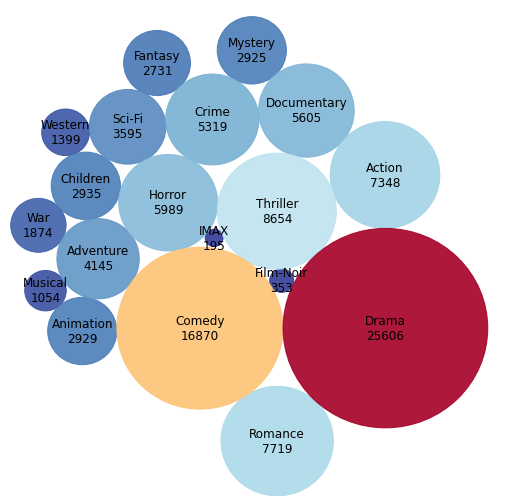

In [ ]:
import circlify
import seaborn as sns
def get_colordict(palette,number,start):
        pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
        color_d = dict(enumerate(pal, start=start))
        return color_d

# compute circle positions:
circles = circlify.circlify(genre_cnt_df['count'].tolist(), 
                                show_enclosure=False, 
                                target_enclosure=circlify.Circle(x=0, y=0)
                        )
n = genre_cnt_df['count'].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

fig, ax = plt.subplots(figsize=(9,9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(genre_cnt_df['genre'])
counts = list(genre_cnt_df['count'])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
        plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

### **Analysis Starting**

**Plot showing density(frequencies/number) of movies released over the years**

In [ ]:
movies_df_tmp = movies_df['title'].str.extract('(?P<Year>\s+\([0-9][0-9][0-9][0-9]\))',expand=True)
movies_df_tmp = movies_df_tmp['Year'].str.extract('(?P<Year1>\((.*?)\))',expand=True)

In [ ]:
movies_df['Release_Year'] = movies_df_tmp[1]

In [ ]:
movies_df.head(5)

,movieId,title,genres,Release_Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


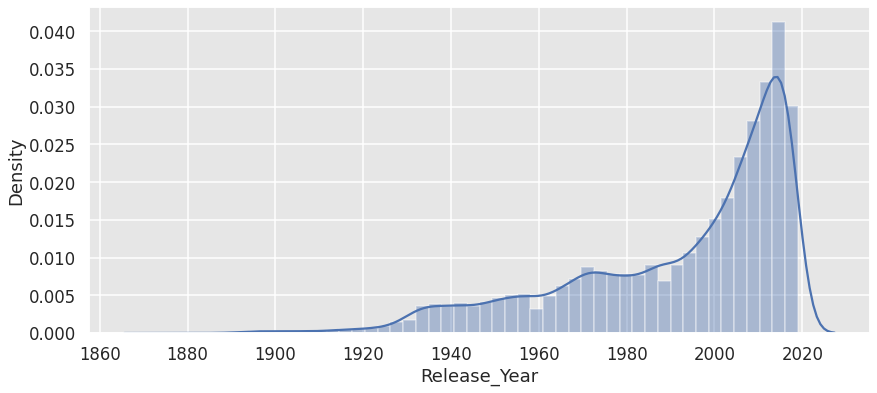

In [ ]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #sns.axes_style("whitegrid")

sns.distplot(movies_df.Release_Year)

**Separating Genres**

In [ ]:
genres_tmp = movies_df['genres'].str.split(pat='|', expand=True).fillna(0)
genres_tmp.columns = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10']
cols = genres_tmp.columns
genres_tmp[cols] = genres_tmp[cols].astype('category')
genres_tmp2 = genres_tmp.copy()
cat_columns = genres_tmp2.select_dtypes(['category']).columns

# count genres for each movie
genres_tmp2[cat_columns] = genres_tmp2[cat_columns].apply(lambda x: x.cat.codes)
genres_tmp2['genre_count'] = genres_tmp2[cols].gt(0).sum(axis=1)

movies_df['genre_count'] = genres_tmp2['genre_count']
movies_df[cols] = genres_tmp[cols]

movies_df.head()

,movieId,title,genres,Release_Year,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3,Adventure,Children,Fantasy,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,2,Comedy,Romance,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,3,Comedy,Drama,Romance,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,1,Comedy,0,0,0,0,0,0,0,0,0


**Getting number of None values in later genres(5 and after)**

In [ ]:
# Get the count of Zeros in column 'genre5' 
count5 = (movies_df['genre5'] == 0).sum()
print("Genre 5: ", count5)

# Get the count of Zeros in column 'genre6' 
count6 = (movies_df['genre6'] == 0).sum()
print("Genre 6: ", count6)

# Get the count of Zeros in column 'genre7' 
count7 = (movies_df['genre7'] == 0).sum()
print("Genre 7: ", count7)

# Get the count of Zeros in column 'genre8' 
count8 = (movies_df['genre8'] == 0).sum()
print("Genre 8: ", count8)

# Get the count of Zeros in column 'genre9' 
count9 = (movies_df['genre9'] == 0).sum()
print("Genre 9: ", count9)

# Get the count of Zeros in column 'genre10' 
count10 = (movies_df['genre10'] == 0).sum()
print("Genre 10: ", count10)

Genre 5:  61593
Genre 6:  62273
Genre 7:  62396
Genre 8:  62420
Genre 9:  62422
Genre 10:  62422


**Genre 1 has no None values**

In [ ]:
# Get the count of Zeros in column 'genre1' 
count1 = (movies_df['genre1'] == 0).sum()
print("Genre 1: ", count1)

Genre 1:  0


**Hence, creating a new ratings dataframe with just Genre 1 merged to it - on movieId**

In [ ]:
cols = ['movieId', 'genre1']
movie_genre = movies_df[cols]
rating_genre_merge = ratings_df.merge(movie_genre, on='movieId', how='inner')

In [ ]:
rating_genre_merge.shape

(25000095, 4)

In [ ]:
rating_genre_merge.head(5)

,userId,movieId,rating,genre1
0,13334,1,5.0,Adventure
1,69000,1,4.0,Adventure
2,26803,1,3.5,Adventure
3,124893,1,3.5,Adventure
4,141835,1,3.5,Adventure


**BoxPlot showing mean rating and min-max ratings for each genre (genre 1)**

(-2.0, 7.0)

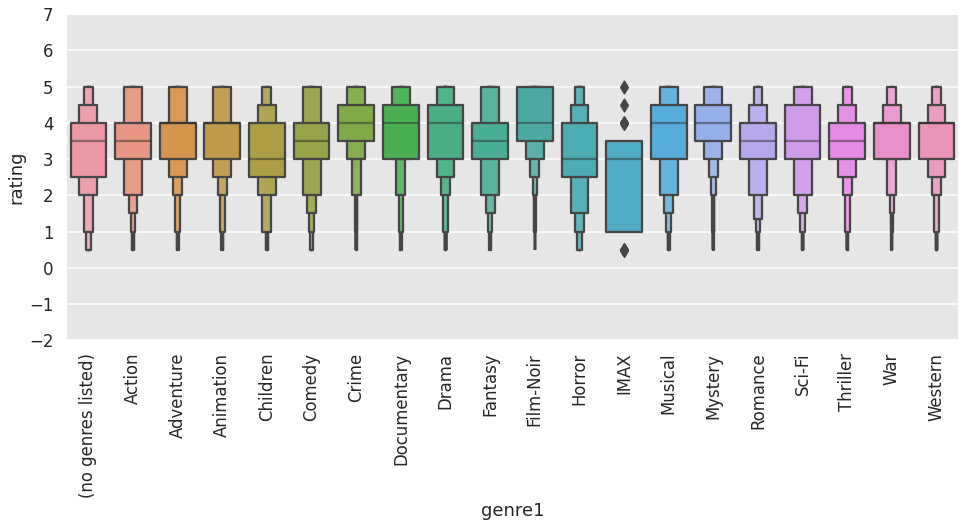

In [ ]:
sns.set(rc={'figure.figsize':(16, 6)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.boxenplot(x=rating_genre_merge.genre1, y=rating_genre_merge.rating, data=rating_genre_merge)
plt.xticks(rotation=90)
plt.ylim(-2, 7)

**Let's see what people normally say about these movies**

In [ ]:
cols = ['movieId','genre1']
tmp_df = movies_df[cols]
tags_df = tags_df.merge(tmp_df, on = 'movieId', how='inner')
tags_df.head(5)

,userId,movieId,tag,genre1
0,3,260,classic,Action
1,3,260,sci-fi,Action
2,110,260,action,Action
3,110,260,adventure,Action
4,110,260,fantasy,Action


In [ ]:
from wordcloud import WordCloud

**1. Comedy**

In [ ]:
comedy_tag = tags_df[tags_df['genre1']=='Comedy']

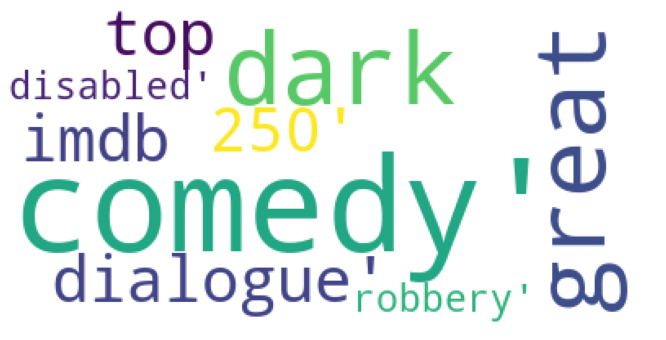

In [ ]:
text = comedy_tag['tag'].values 

wordcloud = WordCloud(background_color ='white', relative_scaling=0.5).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**2. Romance**

In [ ]:
romance_tag = tags_df[tags_df['genre1']=='Romance']

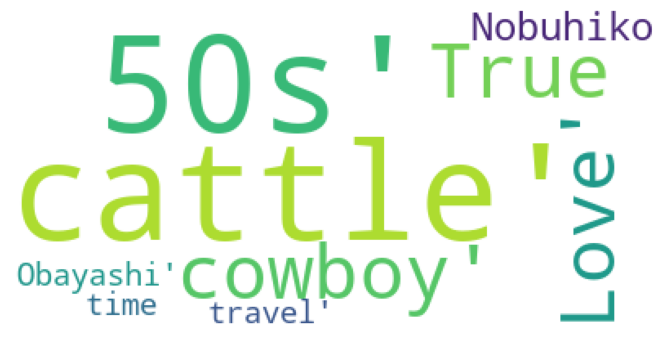

In [ ]:
text = romance_tag['tag'].values 

wordcloud = WordCloud(background_color ='white', relative_scaling=0.5).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**3. Drama**

In [ ]:
d_tag = tags_df[tags_df['genre1']=='Drama']

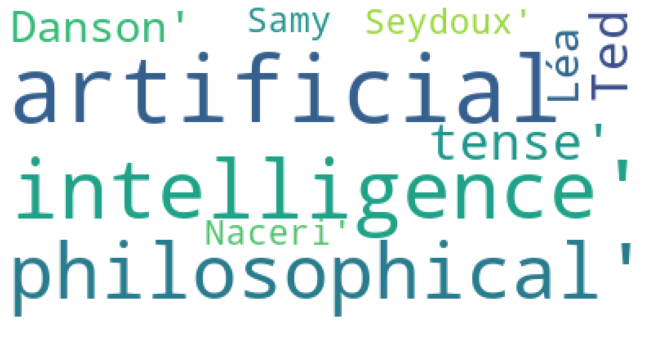

In [ ]:
text = d_tag['tag'].values 

wordcloud = WordCloud(background_color ='white', relative_scaling=0.5).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**4. Horror**

In [ ]:
d_tag = tags_df[tags_df['genre1']=='Horror']

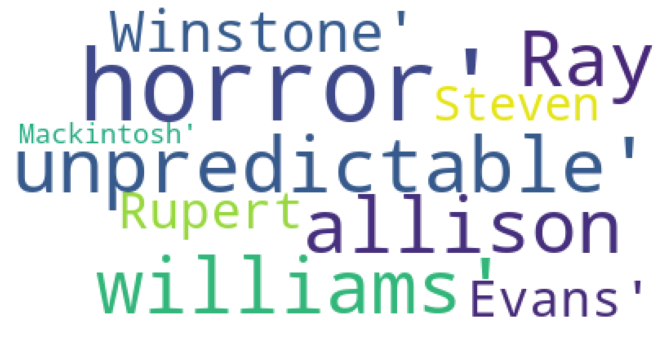

In [ ]:
text = d_tag['tag'].values 

wordcloud = WordCloud(background_color ='white', relative_scaling=0.5).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Let's see how many of each genre's movies were released over the years**

In [ ]:
pop_genres_year = movies_df.groupby(['Release_Year', 'genre1'])['title'].count().reset_index()
pop_genres_year  = pd.DataFrame(pop_genres_year)
pop_genres_year.tail()

,Release_Year,genre1,title
2695,2019,Romance,7
2696,2019,Sci-Fi,13
2697,2019,Thriller,30
2698,2019,War,1
2699,2019,Western,5


**Taking into consideration only movies released after 1930 - Onset of Classic Hollywood**

In [ ]:
pop_genres_year_1930 = pop_genres_year[pop_genres_year['Release_Year']>='1930']

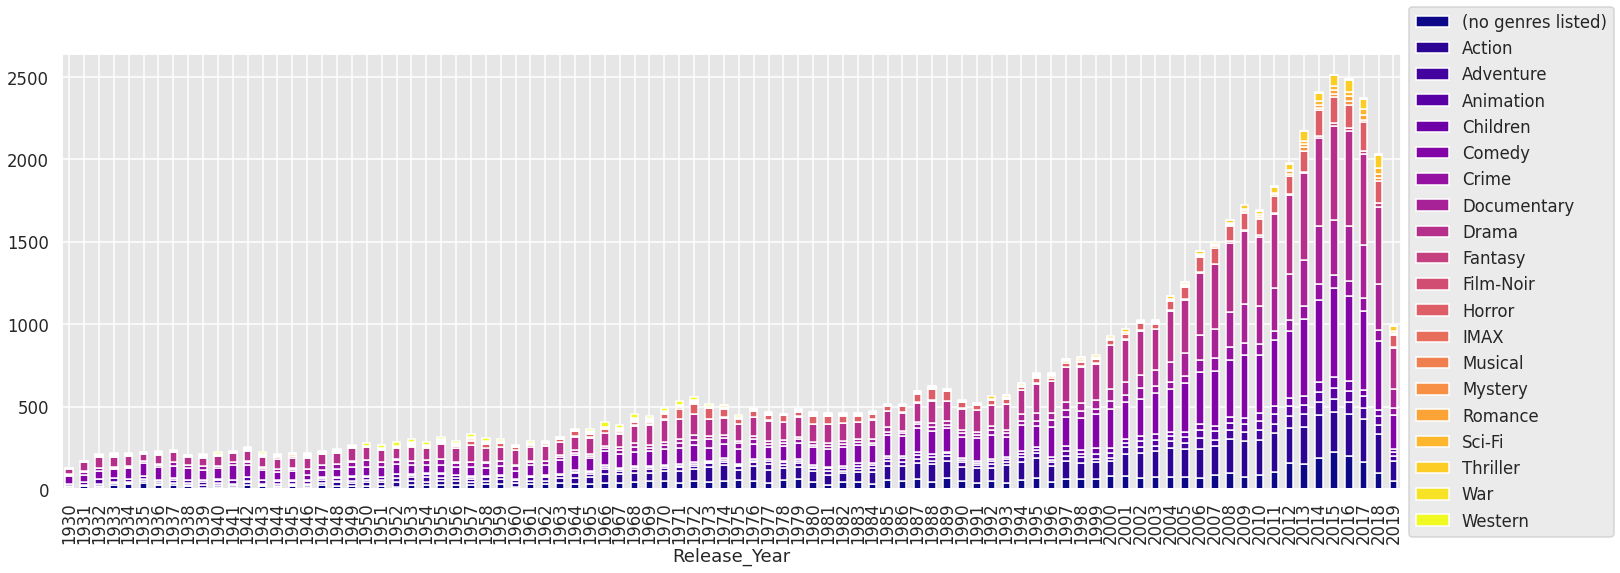

In [ ]:
sns.set(rc={'figure.figsize':(24, 8)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

df_pivot = pd.pivot_table(pop_genres_year_1930, index='Release_Year', columns='genre1', values='title')
df_pivot.plot.bar(stacked=True, colormap='plasma')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Analysis on Ratings Movie Dataframe - Merged**

In [ ]:
new_movies_df = movies_df[['movieId', 'title', 'Release_Year', 'genre1']]

In [ ]:
new_movies_df.head()

,movieId,title,Release_Year,genre1
0,1,Toy Story (1995),1995,Adventure
1,2,Jumanji (1995),1995,Adventure
2,3,Grumpier Old Men (1995),1995,Comedy
3,4,Waiting to Exhale (1995),1995,Comedy
4,5,Father of the Bride Part II (1995),1995,Comedy


In [ ]:
ratings_movie_df = pd.merge(ratings_df, new_movies_df, on='movieId', how='left')

In [ ]:
ratings_movie_df.shape

(25000095, 6)

In [ ]:
ratings_movie_df.head(5)

,userId,movieId,rating,title,Release_Year,genre1
0,13334,1,5.0,Toy Story (1995),1995,Adventure
1,69000,1,4.0,Toy Story (1995),1995,Adventure
2,26803,1,3.5,Toy Story (1995),1995,Adventure
3,124893,1,3.5,Toy Story (1995),1995,Adventure
4,141835,1,3.5,Toy Story (1995),1995,Adventure


**Let's see how many movies of top genres released over the years - Trend**

In [ ]:
genre_popular_year = ratings_movie_df.groupby(['genre1', 'Release_Year' ])['movieId'].count().reset_index()
genre_popular_year  = pd.DataFrame(genre_popular_year)
genre_popular_year.head(5)

,genre1,Release_Year,movieId
0,(no genres listed),1874,0
1,(no genres listed),1878,22
2,(no genres listed),1880,0
3,(no genres listed),1883,11
4,(no genres listed),1887,16


In [ ]:
genre_popular_year = genre_popular_year.rename(columns={'movieId': 'Movies_Released'})

In [ ]:
genre_popular_year.tail(5)

,genre1,Release_Year,Movies_Released
2695,Western,2015,6148
2696,Western,2016,11
2697,Western,2017,73
2698,Western,2018,217
2699,Western,2019,75


In [ ]:
genre_popular_year.shape

(2700, 3)

**Taking into consideration only movies released after 1930 - Onset of Classic Hollywood**

In [ ]:
genre_popular_year_top = genre_popular_year.loc[(genre_popular_year['genre1'] == 'Drama') | (genre_popular_year['genre1'] == 'Comedy') | (genre_popular_year['genre1'] == 'Romance') | (genre_popular_year['genre1'] == 'Action') | (genre_popular_year['genre1'] == 'Thriller') | (genre_popular_year['genre1'] == 'Horror')]

In [ ]:
genre_popular_year_1930 = genre_popular_year_top[genre_popular_year_top['Release_Year']>='1930']

In [ ]:
genres_top = list((genre_popular_year_1930['genre1'].values))

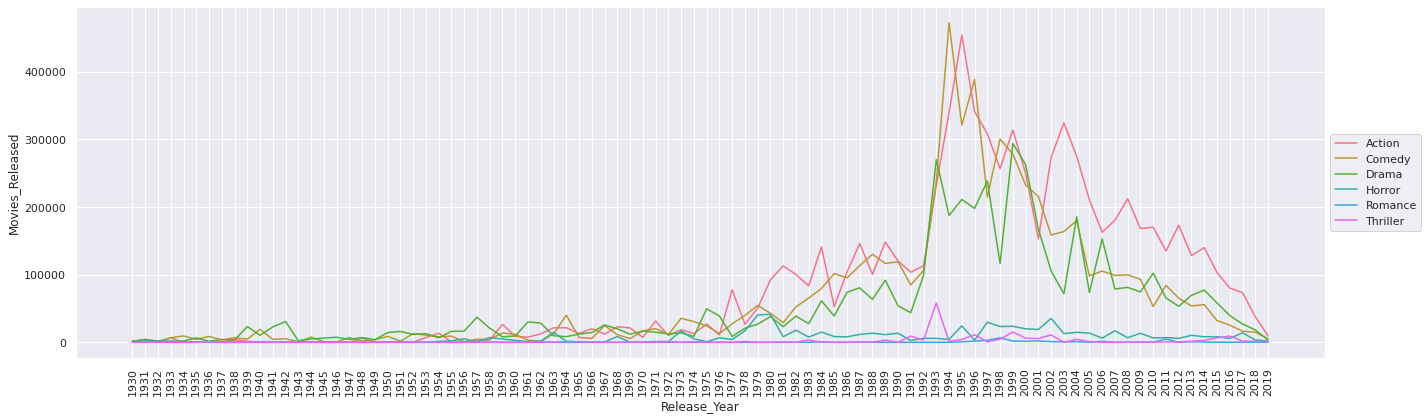

In [ ]:
sns.set(rc={'figure.figsize':(20, 6)})
sns.lineplot(x="Release_Year", y="Movies_Released", hue=genres_top, data=genre_popular_year_1930, palette = 'husl' )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90) 
plt.tight_layout()

**Getting Average Ratings and Count for each movieId**

In [ ]:
#consist of movie titles
movies_df_copy = pd.read_csv('/ml-25m/movies.csv')

In [ ]:
year_rel = movies_df.Release_Year.values

In [ ]:
movies_df_copy['Release_Year'] = year_rel

In [ ]:
movies_df_copy.tail(5)

,movieId,title,genres,Release_Year
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962


In [ ]:
avg_ratings = ratings_df[['movieId' , 'rating']].groupby('movieId').mean().round(2)
movies_avg = movies_df_copy.merge(avg_ratings, how='inner', on='movieId')
movies_avg.head(5)

,movieId,title,genres,Release_Year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.89
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.25
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.14
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.85
4,5,Father of the Bride Part II (1995),Comedy,1995,3.06


In [ ]:
movies_avg.tail(5)

,movieId,title,genres,Release_Year,rating
59042,209157,We (2018),Drama,2018,1.5
59043,209159,Window of the Soul (2001),Documentary,2001,3.0
59044,209163,Bad Poems (2018),Comedy|Drama,2018,4.5
59045,209169,A Girl Thing (2001),(no genres listed),2001,3.0
59046,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962,3.0


In [ ]:
movies_avg['Release_Year'] = pd.to_numeric(movies_avg['Release_Year'])
movies_avg['Release_Year'] = movies_avg['Release_Year'].fillna(0.0).astype(int)

In [ ]:
movies_avg.head(5)

,movieId,title,genres,Release_Year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.89
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.25
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.14
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.85
4,5,Father of the Bride Part II (1995),Comedy,1995,3.06


In [ ]:
year_1930 = movies_avg['Release_Year'] > 1930

movies_avg_1930 = movies_avg[year_1930]

In [ ]:
x = movies_avg_1930['Release_Year'].unique()

y1 = movies_avg_1930[['Release_Year','rating']].groupby('Release_Year').mean()  # average ratings

y2 = movies_avg_1930[['Release_Year','title']].groupby('Release_Year').count()  # count of movies

**Plots showing mean ratings and number of ratings from 1930 onwards**

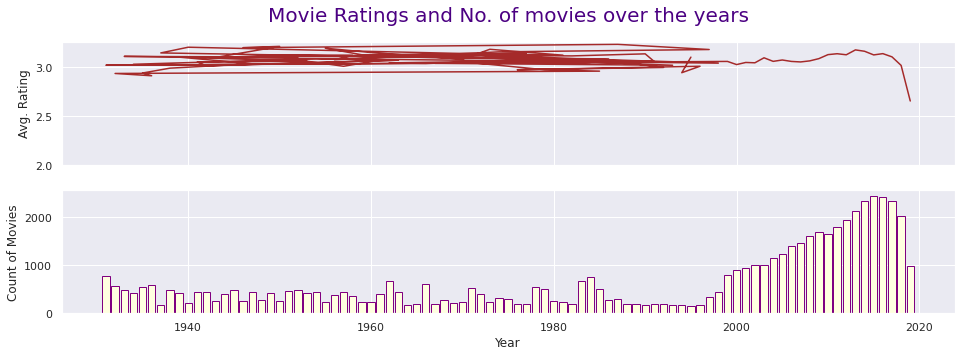

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,5), sharex=True)

ax1.set_title('Movie Ratings and No. of movies over the years', loc = 'center' , pad = 20 , fontdict={'fontsize':20 , 'color' : 'indigo', 
#                                                                                  'fontstyle' : 'italic',
                                                                                'fontfamily' : 'Tahoma'})
ax1.plot(x,y1,color='brown')
ax1.set_ylabel('Avg. Rating')
ax1.set_ylim(2,)

ax2.bar( x, y2.title.values,  color = 'lightyellow', label=True, edgecolor = 'purple' )
ax2.set_ylabel('Count of Movies')
ax2.set_xlabel('Year')

plt.show()

**Zooming in on years from 1990**

In [ ]:
year_1990 = movies_avg['Release_Year'] > 1990

movies_avg_1990 = movies_avg[year_1990]

In [ ]:
x = movies_avg_1990['Release_Year'].unique()

y1 = movies_avg_1990[['Release_Year','rating']].groupby('Release_Year').mean()  # average ratings

y2 = movies_avg_1990[['Release_Year','title']].groupby('Release_Year').count()  # count of movies

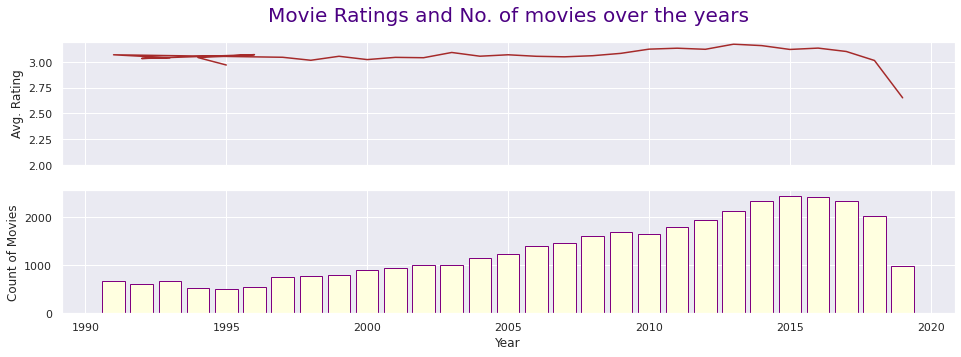

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,5), sharex=True)

ax1.set_title('Movie Ratings and No. of movies over the years', loc = 'center' , pad = 20 , fontdict={'fontsize':20 , 'color' : 'indigo', 
#                                                                                  'fontstyle' : 'italic',
                                                                                'fontfamily' : 'Tahoma'})
ax1.plot(x,y1,color='brown')
ax1.set_ylabel('Avg. Rating')
ax1.set_ylim(2,)

ax2.bar( x, y2.title.values,  color = 'lightyellow', label=True, edgecolor = 'purple' )
ax2.set_ylabel('Count of Movies')
ax2.set_xlabel('Year')

plt.show()

**Release Count and Rating Count Over the years - from 1990**

In [ ]:
ratings_movie_df.head(5)

,userId,movieId,rating,title,Release_Year,genre1
0,13334,1,5.0,Toy Story (1995),1995,Adventure
1,69000,1,4.0,Toy Story (1995),1995,Adventure
2,26803,1,3.5,Toy Story (1995),1995,Adventure
3,124893,1,3.5,Toy Story (1995),1995,Adventure
4,141835,1,3.5,Toy Story (1995),1995,Adventure


In [ ]:
ratings_movie_df['Release_Year'] = ratings_movie_df['Release_Year'].fillna(0.0).astype(int)

In [ ]:
ratings_movie_df.head()

,userId,movieId,rating,title,Release_Year,genre1
0,13334,1,5.0,Toy Story (1995),1995,Adventure
1,69000,1,4.0,Toy Story (1995),1995,Adventure
2,26803,1,3.5,Toy Story (1995),1995,Adventure
3,124893,1,3.5,Toy Story (1995),1995,Adventure
4,141835,1,3.5,Toy Story (1995),1995,Adventure


(0.0, 1570977.0)

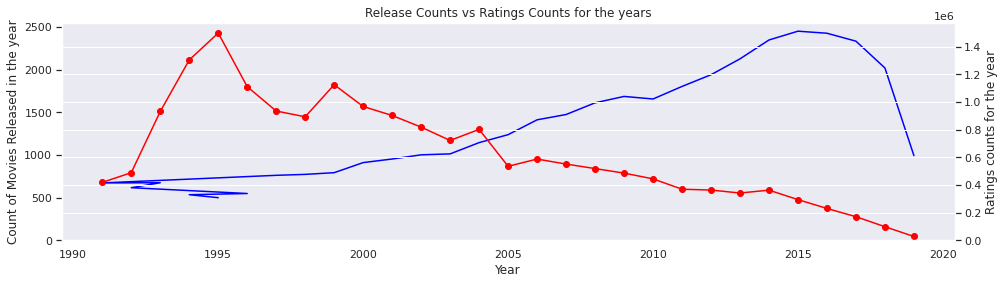

In [ ]:
# Count of ratings collected per year
ratings_per_year = ratings_movie_df_1990[['Release_Year' , 'movieId']].groupby('Release_Year').count()

# plot commong graph keeping year scale common for rating and movie counts

fig, ax1 = plt.subplots(figsize=(16,4))

ax1.set_title('Release Counts vs Ratings Counts for the years')
ax1.plot(x,y2,color='Blue')
ax1.set_ylabel('Count of Movies Released in the year')
ax1.set_xlabel('Year')
ax1.grid(None)
ax1.set_ylim(0,)
# ax1.legend(True)

ax2 = ax1.twinx()
ax2.plot(ratings_per_year,'-ro' , color='red' )
ax2.set_ylabel('Ratings counts for the year')
ax2.set_ylim(0,)

**Top movies (across genre) - taking into account the rating count and average ratings both**

In [ ]:
# count of ratings
count_of_ratings = ratings_df[['movieId' , 'userId']].groupby('movieId').count()
count_of_ratings.rename(columns={'userId' : 'Total_Ratings'}, inplace=True)

# mean Ratings
avg_ratings = ratings_df[['movieId' , 'rating']].groupby('movieId').mean().round(2)
movies_avg = movies_df_copy.merge(avg_ratings, how='inner', on='movieId')

# Joining count of ratings with movies names
# top 25 most rated movies of all time
movie_rating_counts = movies_avg[['movieId','title', 'genres', 'rating']].merge(count_of_ratings, on='movieId')

movie_rating_counts.rename(columns={'rating' : 'Average_Rating'}, inplace=True)
movie_rating_counts.sort_values(['Total_Ratings', 'Average_Rating'], ascending=[False, False])[:10] [['title', 'genres' , 'Total_Ratings', 'Average_Rating']]

,title,genres,Total_Ratings,Average_Rating
351,Forrest Gump (1994),Comedy|Drama|Romance|War,81491,4.05
314,"Shawshank Redemption, The (1994)",Crime|Drama,81482,4.41
292,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,79672,4.19
585,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,74127,4.15
2480,"Matrix, The (1999)",Action|Sci-Fi|Thriller,72674,4.15
257,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,68717,4.12
475,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,64144,3.68
522,Schindler's List (1993),Drama|War,60411,4.25
108,Braveheart (1995),Action|Drama|War,59184,4.00
2867,Fight Club (1999),Action|Crime|Drama|Thriller,58773,4.23


### References

**I have taken some help regarding the actual code for different plots from below sources. Details like which plot to use and hyperparameters like figsize and others were just taken from them. Rest everything, creation of different dataframes and getting respective values in them through merging and different conditions so that we can use these dataframes and these values to create these plot were done on my own:**



1.   **Exploratory Analysis - MovieLens DataSet:** *https://www.kaggle.com/code/makarandm/exploratory-analysis-movielens-dataset*
2.   *https://github.com/SaadMuhammad/movie_db/blob/main/Analysis_Report_Movielens_dataset.ipynb*